# 3. Relationships
**Up until this point, you've only looked at one variable at a time. In this chapter, you'll explore relationships between variables two at a time, using scatter plots and other visualizations to extract insights from a new dataset obtained from the Behavioral Risk Factor Surveillance Survey (BRFSS). You'll also learn how to quantify those relationships using correlation and simple regression.**

## Exploring relationships
Now it's time to explore relationships between variables.

###  Height and weight
As a first example, we'll look at the relationship between height and weight. I'll use data from the Behavioral Risk Factor Surveillance Survey, or BRFSS, which is run by the Centers for Disease Control. The survey includes more than 400,000 respondents, but to keep things manageable, we'll use a random subsample of 100,000.

### Scatter plot
A common way to visualize the relationship between two variables is a scatter plot. Scatter plots are common and readily understood, but they are surprisingly hard to get right. To demonstrate, I'll load the BRFSS dataset and extract the variables for height in centimeters and weight in kilograms. pyplot provides a `scatter()` function that makes a scatter plot, but it is more versatile than we need and slower than we want. It is faster to use `plot()` with the format string `'o'`, which plots a circle for each data point. And, as always, we have to label the axes. Here's what it looks like.

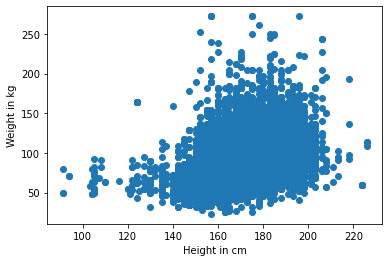

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

brfss = pd.read_hdf('brfss.hdf5', 'brfss')

height = brfss['HTM4']
weight = brfss['WTKG3']

plt.plot(height, weight, 'o')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### Overplotting
In general, it looks like taller people are heavier, but there are a few things about this scatter plot that make it hard to interpret. Most importantly, it is "overplotted", which means that there are data points piled on top of each other so you can't tell where there are a lot of points and where there is just one. When that happens, the results can be really misleading.

### Transparency
One way to improve it is to use transparency, which we can do with the alpha parameter. The lower the value of alpha, the more transparent each data point is. Here's what it looks like with `alpha=0.02`. 

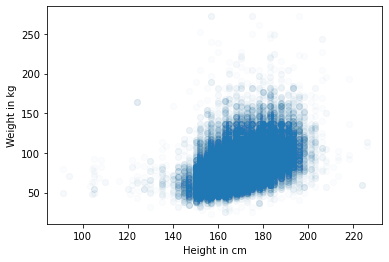

In [2]:
plt.plot(height, weight, 'o', alpha=0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

This is better, but there are so many data points, the scatter plot is still overplotted. The next step is to make the markers smaller.

### Marker size
With `markersize=1` and a low value of alpha, the scatter plot is less saturated. Here's what it looks like. 

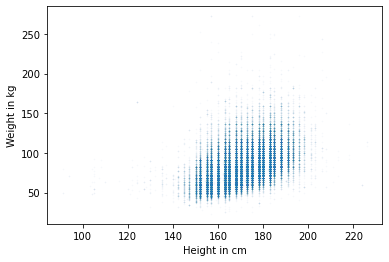

In [3]:
plt.plot(height, weight, 'o', markersize=1, alpha=0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

Again, this is better, but now we can see that the points fall in discrete columns. That's because most heights were reported in inches and converted to centimeters. We can break up the columns by adding some random noise to the values; in effect, we are filling in the values that got rounded off.

### Jittering
Adding random noise like this is called "jittering". In this example, I added noise with mean `0` and standard deviation `2`. Here's what the plot looks like when we jitter height. 

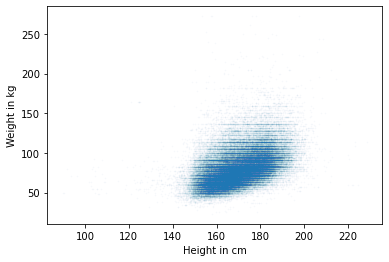

In [4]:
import numpy as np

height_jitter = height + np.random.normal(0, 2, size=len(brfss))

plt.plot(height_jitter, weight, 'o', markersize=1, alpha=0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

The columns are gone, but now we can see that there are rows where people rounded off their weight. We can fix that by jittering weight, too.

### More jittering
Here's the code. And here's the result. 

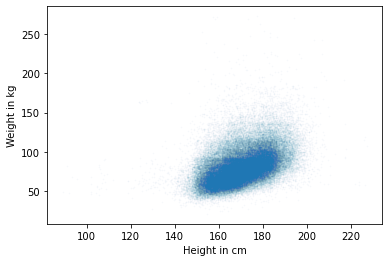

In [5]:
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))

plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

Finally, let's zoom in on the area where most of the data points are.

### Zoom
The pyplot function `axis()` sets the lower and upper bounds for the x- and y-axis; in this case, we plot heights from 140 to 200 centimeters and weights up to 160 kilograms. Here's what it looks like. 

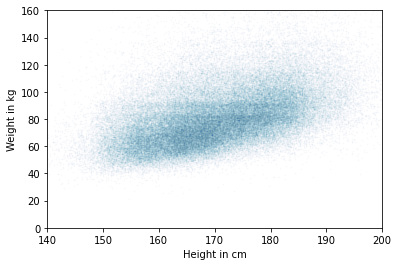

In [6]:
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)

plt.axis([140, 200, 0, 160])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

Finally, we have a reliable picture of the relationship between height and weight.

### Before and after
Here's the plot we started with and the one we ended with. 

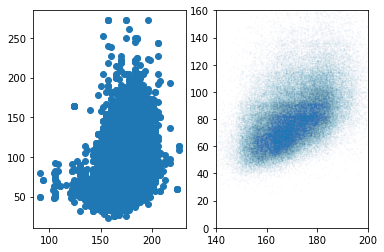

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(height, weight, 'o')
ax2.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
ax2.axis([140, 200, 0, 160])
plt.show()

Clearly, they are very different, and they suggest different stories about the relationship between these variables. The point of this example is that it takes some effort to make an effective scatter plot.

## PMF of age
Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a `.bar()` method to make a bar chart.

The BRFSS dataset includes a variable, `'AGE'` (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. `'AGE'` contains the midpoint of the bins.

- Extract the variable `'AGE'` from the DataFrame `brfss` and assign it to `age`.
- Get the PMF of `age` and plot it as a bar chart.

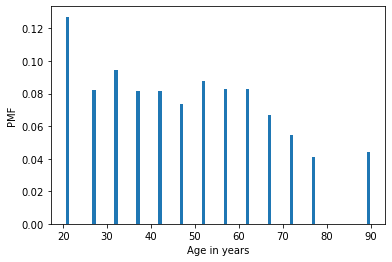

In [8]:
from empiricaldist import Pmf

# Extract age
age = brfss['AGE']

# Plot the PMF
pmf_age = Pmf.from_seq(age)
pmf_age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

*Notice that the last age range is bigger than the others. That's the kind of thing you see when you plot distributions.*

## Scatter plot
Now let's make a scatterplot of `weight` versus `age`. To make the code run faster, only the first 1000 rows are selected from the brfss DataFrame.
- Make a scatter plot of `weight` and `age` with format string `'o'` and `alpha=0.1`.

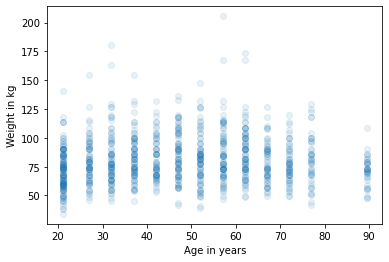

In [9]:
# Select the first 1000 respondents
brfss_1000 = brfss[:1000]

# Extract age and weight
age = brfss_1000['AGE']
weight = brfss_1000['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

*By adjusting alpha we can avoid saturating the plot.*

## Jittering
In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly. Recall how to jitter `height` and `weight`:
```python
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
```
- Add random noise to `age` with mean `0` and standard deviation `2.5`.
- Make a scatter plot between `weight` and `age` with marker size `5` and `alpha=0.2`. Be sure to also specify `'o'`.

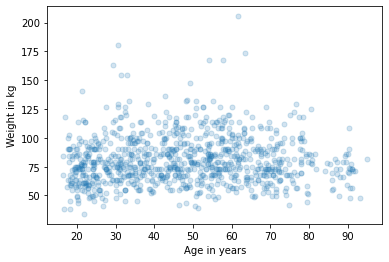

In [10]:
# Add jittering to age
age = brfss_1000['AGE'] + np.random.normal(0, 2.5, size=len(brfss_1000))
# Extract weight
weight = brfss_1000['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize=5 ,alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

*By smoothing out the ages and avoiding saturation, we get the best view of the data. But in this case the nature of the relationship is still hard to see.*

---

## Visualizing relationships
We'll see other ways to visualize these relationships, including boxplots and violin plots.

### Weight and age
In the previous exercises, you made a scatter plot of weight versus age. Your code probably looked like this. And the results looked like this. 


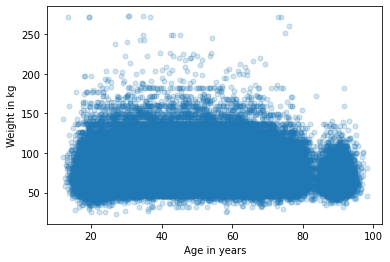

In [11]:
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))

weight = brfss['WTKG3']

plt.plot(age, weight, 'o', markersize=5 ,alpha=0.2)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

It looks like older people might be heavier, but it is hard to see clearly.

### More data
For the exercises, you worked with a small subset of the data. Now let's see what it looks like with more data. Here's the code. And here's the plot. 

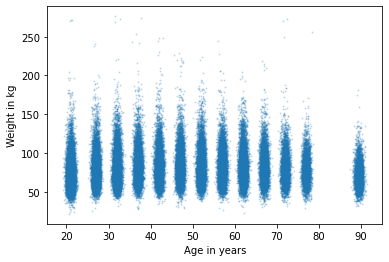

In [12]:
age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))

plt.plot(age, weight, 'o', markersize=1, alpha=0.2)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

There are few changes in the code: 
- First, the marker size is reduced, because there is more data now, 
- Second, the weights is jittered, so the horizontal rows are not visible. 
- The ages is jittered, too, but less than in the exercise, so the data points are spread out, but there's still space between the columns. 

That makes it possible to see the shape of the distribution in each age group, and the differences between groups. If we take this idea one step farther, we can use KDE to estimate the density function in each column and plot it.

### Violin plot
And there's a name for that; it's called a violin plot. 

Seaborn provides a function that makes violin plots, but before we can use it, we have to get rid of any rows with missing data. Here's how. `dropna()` creates a new DataFrame that contains the rows from `brfss` where `AGE` and `WTKG3` are not `NaN`. Now we can call `violinplot()`. The x and y parameters mean we want `AGE` on the x-axis and `WTKG3` on the y-axis. `data` is the DataFrame we just created, which contains the variables we're going to plot. The parameter `inner=None` simplifies the plot a little. Here's what it looks like. 

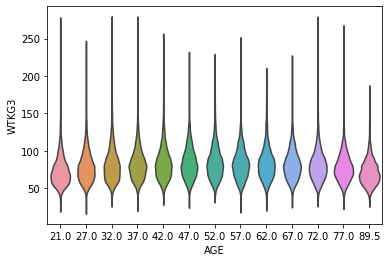

In [13]:
import seaborn as sns
data = brfss.dropna(subset=['AGE', 'WTKG3'])
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)
plt.show()

Each column is a graphical representation of the distribution of weight in one age group. The width of these shapes is proportional to the estimated density, so it's like two vertical PDFs plotted back to back, and filled in with nice colors. There's one other way to look at data like this, called a box plot.

### Box plot
The code to generate a box plot is very similar. I put in the parameter `whis=10` to turn off a feature we don't need. Here's what it looks like.

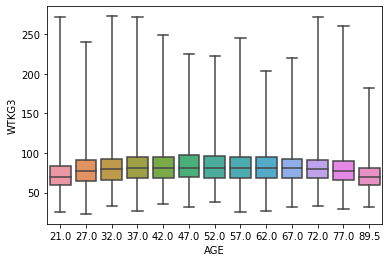

In [14]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.show()

Each box represents the interquartile range, or IQR, from the 25th to the 75th percentile. The line in the middle of each box is the median. The spines sticking out of the top and bottom show the minimum and maximum values. In my opinion, this plot gives us the best view of the relationship between weight and age. 

Looking at the medians, it seems like people in their 40s are the heaviest; younger and older people are lighter. Looking at the sizes of the boxes, it seems like people in their 40s have the most variability in weight, too. These plots also show how skewed the distribution of weight is; that is, the heaviest people are much farther from the median than the lightest people.

### Log scale
For data that skews toward higher values, it is sometimes useful to look at it on a logarithmic scale. We can do that with the pyplot function `yscale()`. Here's what it looks like.

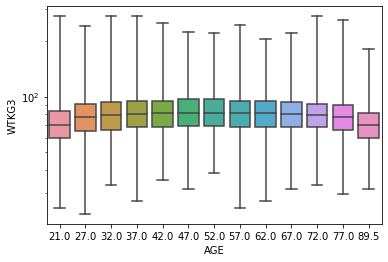

In [15]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
plt.show()

 To show the relationship between age and weight most clearly, this is probably the figure I would use.

## Height and weight
Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The `brfss` DataFrame contains a variable `'_HTMG10'` that represents height in centimeters, binned into 10 cm groups.

Recall how create the box plot of `'AGE'` and `'WTKG3'`, with the y-axis on a logarithmic scale:
```python
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
```

- Fill in the parameters of `boxplot()` to plot the distribution of weight (`'WTKG3'`) in each height (`'_HTMG10'`) group. Specify `whis=10`.
- Add a line to plot the y-axis on a logarithmic scale.

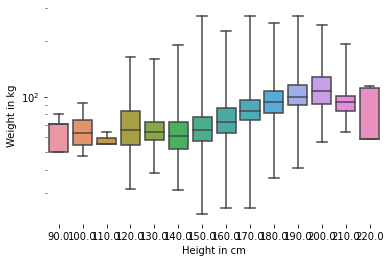

In [16]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


*These box plots provide a good view of the relationship between the variables. They also show the spread of the values in each column.*

## Distribution of income
In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8 income categories. The variable name is `'INCOME2'`. Before we connect income with anything else, let's look at the distribution by computing the PMF. Recall that all `Pmf` objects have a `.bar()` method.

- Extract `'INCOME2'` from the `brfss` DataFrame and assign it to `income`.
- Plot the PMF of `income` as a bar chart.

In [17]:
from empiricaldist import Pmf

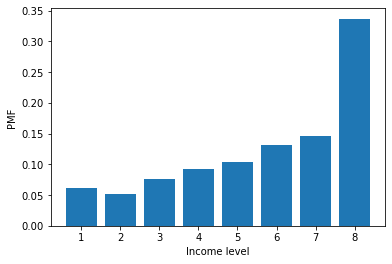

In [18]:
# Extract income
income = brfss['INCOME2']

# Plot the PMF
Pmf.from_seq(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

*Almost half of the respondents are in the top income category, so this dataset doesn't distinguish between the highest incomes and the median. But maybe it can tell us something about people with incomes below the median.*

## Income and height
Let's now use a violin plot to visualize the relationship between income and height.
- Create a violin plot to plot the distribution of height (`'HTM4'`) in each income (`'INCOME2'`) group. Specify `inner=None` to simplify the plot.

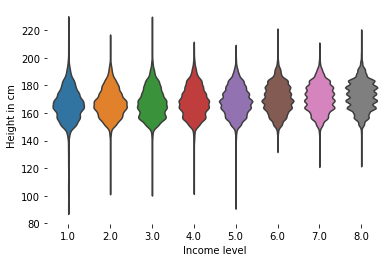

In [19]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()


*It looks like there is a weak positive relationsip between income and height, at least for incomes below the median.*

---

## Correlation
In this lesson we'll learn about the coefficient of correlation, which quantifies the strength of these relationships.

### Correlation coefficient
When people say "correlation" casually, they might mean any relationship between two variables. In statistics, it usually means Pearson's correlation coefficient, which is a number between -1 and 1 that quantifies the strength of a linear relationship between variables.

To demonstrate, I'll select three columns from the BRFSS dataset, like this. The result is a DataFrame with just those columns. Now we can use the `corr()` method, like this.

In [20]:
columns = ['HTM4', 'WTKG3', 'AGE']
subset = brfss[columns]

subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


### Correlation matrix
The result is a "correlation matrix". 

- Height with itself: 1 
    - That's expected; the correlation of anything with itself is 1.
- Height and Weight: 0.47 
    - It's positive, which means taller people are heavier, and it is moderate in strength, which means it has some predictive value. If you know someone's height, you can make a better guess about their weight, and vice versa.
- Height and Age: -0.09
    - It's negative, which means that older people tend to be shorter, but it's weak, which means that knowing someone's age would not help much if you were trying to guess their height.
- Weight and Age: 0.02
    - The correlation between age and weight is even smaller than the correlation between age and height. It is tempting to conclude that there is no relationship between age and weight, but we have already seen that there is. 
    
So why is the correlation so low?

### Weight and age
Remember that the relationship between weight and age looks like this. People in their 40s are the heaviest; younger and older people are lighter. So this relationship is **nonlinear**.

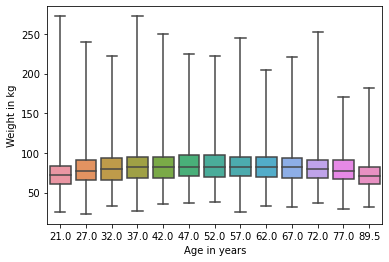

In [21]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

### Nonlinear relationships
But correlation only works for linear relationships. If the relationship is nonlinear, correlation generally underestimates how strong it is. 

To demonstrate, I'll generate some fake data: xs contains equally-spaced points between -1 and 1. ys is xs squared plus some random noise.

In [22]:
xs = np.linspace(-1, 1)
ys = xs**2
#ys += normal(0, 0.05, len(xs))
np.corrcoef(xs, ys)

array([[ 1.00000000e+00, -4.86224456e-17],
       [-4.86224456e-17,  1.00000000e+00]])

Here's the correlation matrix; the computed correlation is close to 0. 

In general, if correlation is high -- that is, close to 1 or -1, you can conclude that there is a strong linear relationship. But if correlation is close to 0, that doesn't mean there is no relationship; there might be a strong, non-linear relationship. This is one of the reasons I think correlation is not such a great statistic.

### Keep using that word
There's another reason to be careful with correlation; it doesn't mean what people take it to mean. Specifically, correlation says nothing about slope. If we say that two variables are correlated, that means we can use one to predict the other. But that might not be what we care about.

The statistic we really care about is the slope of the line.

## Computing correlations
The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable `'_VEGESU1'` represents the number of servings of vegetables respondents reported eating per day.

Let's see how this variable relates to age and income.
- From the `brfss` DataFrame, select the columns `'AGE'`, `'INCOME2'`, and `'_VEGESU1'`.
- Compute the correlation matrix for these variables.

In [23]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


*So far, so good. In the next exercise you'll think about how to interpret these results.*

## Interpreting correlations
In the previous exercise, the correlation between income and vegetable consumption is about `0.12`. The correlation between age and vegetable consumption is about `-0.01`.

Which of the following are correct interpretations of these results:

    A : People with higher incomes eat more vegetables.
    B : The relationship between income and vegetable consumption is linear.
    C : Older people eat more vegetables.
    D : There could be a strong nonlinear relationship between age and vegetable consumption.

1. ~A and C only.~
2. ~B and D only.~
3. ~B and C only.~
4. **A and D only.**

**Answer: 4** The correlation between income and vegetable consumption is small, but it suggests that there is a relationship. But a correlation close to 0 does mean there is no relationship.



---

## Simple regression
We saw that correlation does not always measure what we really want to know. In this lesson, we look at an alternative - simple linear regression.

### Strength of effect
To estimate the slope of the line, we can use `linregress()` from the `SciPy` stats module. The result is a `LinRegressResult` object that contains five values: slope is the slope of the line of best fit for the data; intercept is the intercept. 


```python
from scipy.stats import linregress

# Hypothetical 1
res = linregress(xs, ys)
```
```
LinregressResult(slope=0.018821034903244386,
                intercerpt=75.08049023710964,
                rvalue=0.7579660563439402,
                pvalue=1.8470158725246148e-10,
                stderr=0.002337849260560818)
```

For Hypothetical #1, the estimated slope is about 0.019 kilograms per year or about 0.6 kilograms over the 30-year range.

Here are the results for Hypothetical #2. 
```python
# Hypothetical 2
res = linregress(xs, ys)
```
```
LinregressResult(slope=0.17642069806488855,
                intercerpt=66.60980474219305,
                rvalue=0.47827769765763173,
                pvalue=0.0004430600283776241,
                stderr=0.04675698521121631)
```
The estimated slope is about 10 times higher: about 0 point 18 kilograms per year or 6 kilograms per 30 years, What's called rvalue here is correlation, which confirms what we saw before; the first example has higher correlation, about 0 point 76 compared to 0 point 48. But the strength of the effect, as measured by the slope of the line, is about 10 times higher in the second example.

### Regression lines
We can use the results from `linregress()` to compute the line of best fit: first we get the `min` and `max` of the observed `xs`; then we multiply by the slope and add the intercept. And plot the line. 

```python
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')
```

And the same thing for the second example. 

The visualization here might be misleading unless you look closely at the vertical scales; the slope of the second is almost 10 times higher.

### Height and weight
Now let's look at an example with real data. Here's the scatter plot of height and weight again, from Lesson 1.


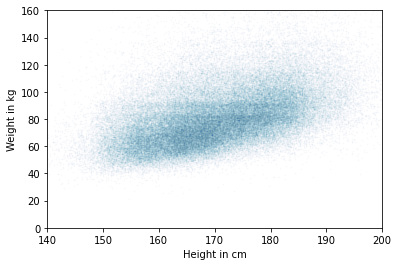

In [24]:
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)

plt.axis([140, 200, 0, 160])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### Regression line
Now we can compute the regression line. `linregress()` can't handle NaNs, so we have to use `dropna()` to remove rows that are missing the data we need. 

In [25]:
subset = brfss.dropna(subset=['WTKG3', 'HTM4'])

Now we can compute the linear regression. And here are the results. 

In [26]:
from scipy.stats import linregress
xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.9192115381848297, intercept=-75.12704250330233, rvalue=0.47420308979024584, pvalue=0.0, stderr=0.005632863769802998, intercept_stderr=0.9608860265433182)


The slope is about 0 point 9 kilograms per centimeter, which means that we expect a person one centimeter taller to be almost a kilogram heavier. That's quite a lot.

### Line of best fit
As before, we can compute the line of best fit and plot it. And here's what that looks like.

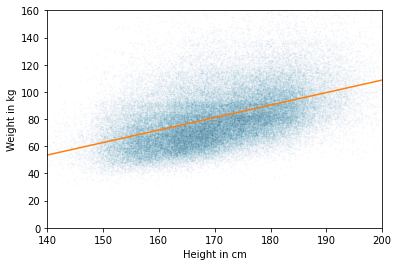

In [27]:
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 160])

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

The slope of this line seems consistent with the scatter plot.

### Linear relationships
However, linear regression has the same problem as correlation; it only measures the strength of a linear relationship. Here's the scatter plot of weight versus age, which you saw in a previous exercise. 

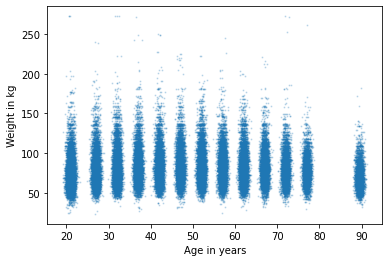

In [28]:
age = brfss['AGE'] + np.random.normal(0, .5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, .2, size=len(brfss))

plt.plot(age, weight, 'o', markersize=1, alpha=0.2)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()


People in their 40s are the heaviest; younger and older people are lighter. So the relationship is nonlinear.

### Nonlinear relationships
If we don't look at the scatter plot and blindly compute the regression line, here's what we get. 

In [29]:
subset = brfss.dropna(subset=['WTKG3', 'AGE'])
xs = subset['AGE']
ys = subset['WTKG3']

res = linregress(xs, ys)
res

LinregressResult(slope=0.023981159566968724, intercept=80.07977583683224, rvalue=0.021641432889064068, pvalue=4.374327493007566e-11, stderr=0.003638139410742186, intercept_stderr=0.18688508176870167)

The estimated slope is only 0 point 02 kilograms per year, or 0 point 6 kilograms in 30 years.

### Not a good fit
And here's what the line of best fit looks like.

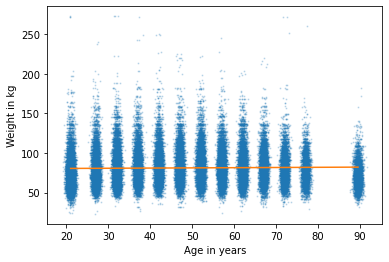

In [30]:
age = brfss['AGE'] + np.random.normal(0, .5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, .2, size=len(brfss))

plt.plot(age, weight, 'o', markersize=1, alpha=0.2)
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

 A straight line does not capture the relationship between these variables well.

## Income and vegetables
As we saw in a previous exercise, the variable `'_VEGESU1'` represents the number of vegetable servings respondents reported eating per day.

Let's estimate the slope of the relationship between vegetable consumption and income.
- Extract the columns `'INCOME2'` and `'_VEGESU1'` from `subset` into `xs` and `ys` respectively.
- Compute the simple linear regression of these variables.

In [31]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305, intercept_stderr=0.013196467544093591)


*The estimated slope tells the increase in vegetable servings from one income group to the next.*

## Fit a line
Continuing from the previous exercise:

Assume that `xs` and `ys` contain income codes and daily vegetable consumption, respectively, and `res` contains the results of a simple linear regression of `ys` onto `xs`.

Now, you're going to compute the line of best fit.

- Set `fx` to the minimum and maximum of `xs`, stored in a NumPy array.
- Set `fy` to the points on the fitted line that correspond to the `fx`.

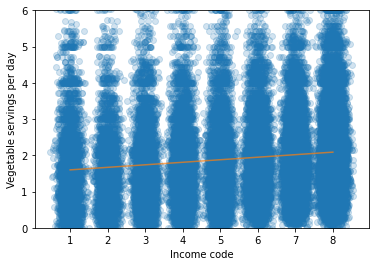

In [32]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()